In [46]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import Sequential
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import h5py
import cv2
import imageio
import pathlib
%matplotlib inline

In [48]:
rescale = ImageDataGenerator(1/255)
train = rescale.flow_from_directory('/content/drive/MyDrive/python_final_project/img_dataset/seg_train/seg_train', target_size= (128,128), batch_size= 32, class_mode="categorical")
test = rescale.flow_from_directory('/content/drive/MyDrive/python_final_project/img_dataset/seg_test/seg_test', target_size= (128,128), batch_size= 32, class_mode="categorical")

Found 13688 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [67]:
#build the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [71]:
earlystop = EarlyStopping(monitor='val_loss', patience= 6, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/python_final_project/img_dataset/saved_model2.hdf5', monitor='val_loss', save_best_only=True)
reducerate = ReduceLROnPlateau(monitor='val_loss', parience=6, factor=0.1)

In [72]:
fitmodel = model.fit(train, shuffle=True, validation_data= test, callbacks=[earlystop, reducerate, checkpoint], epochs=10, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
428/428 - 36s - loss: 1.5584 - accuracy: 0.5149 - val_loss: 0.8483 - val_accuracy: 0.6803
Epoch 2/10
428/428 - 33s - loss: 0.9248 - accuracy: 0.6563 - val_loss: 0.7404 - val_accuracy: 0.7413
Epoch 3/10
428/428 - 34s - loss: 0.7843 - accuracy: 0.7176 - val_loss: 0.6767 - val_accuracy: 0.7563
Epoch 4/10
428/428 - 34s - loss: 0.7015 - accuracy: 0.7493 - val_loss: 0.6325 - val_accuracy: 0.7683
Epoch 5/10
428/428 - 34s - loss: 0.6687 - accuracy: 0.7663 - val_loss: 0.5779 - val_accuracy: 0.7980
Epoch 6/10
428/428 - 33s - loss: 0.5739 - accuracy: 0.7998 - val_loss: 0.5820 - val_accuracy: 0.7960
Epoch 7/10
428/428 - 33s - loss: 0.5347 - accuracy: 0.8107 - val_loss: 0.5588 - val_accuracy: 0.8077
Epoch 8/10
428/428 - 34s - loss: 0.4981 - accuracy: 0.8242 - val_loss: 0.5611 - val_accuracy: 0.8133
Epoch 9/10
428/428 - 33s - loss: 0.4784 - accuracy: 0.8307 - val_loss: 0.6576 - val_accuracy: 0.7947
Epoch 10/10
428/428 - 34s - loss: 0.4244 - accuracy: 0.8507 - val_loss: 0.5971 - val_accura

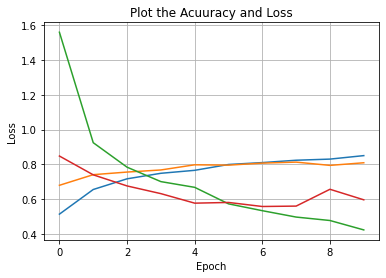

In [73]:
plt.plot(fitmodel.history['accuracy'], label='train')
plt.plot(fitmodel.history['val_accuracy'], label='train')
plt.plot(fitmodel.history['loss'], label='train')
plt.plot(fitmodel.history['val_loss'], label='train')
plt.title("Plot the Acuuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [77]:
import tensorflow as tf

tf.keras.models.save_model(model,'/content/drive/MyDrive/python_final_project/img_dataset/saved_model8.hdf5')